In [1]:
!pip install scikit-learn opencv-python matplotlib numpy seaborn

In [2]:
# lab8_digits.py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler



In [3]:
# 1. Load dataset
data = load_digits()
X = data.images # shape (n_samples, 8, 8)
y = data.target
n_samples = len(X)
X = X.reshape((n_samples, -1)) # flatten to (n_samples, 64)



In [4]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [5]:
# 3. Optionally scale features (useful for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 4. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("--- KNN ---")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


--- KNN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.96      1.00      0.98        46
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        45
           5       1.00      0.98      0.99        46
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        45
           8       0.97      0.91      0.94        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy: 0.9844444444444445


In [8]:
# 5. SVM (linear kernel)
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)


print("\n--- SVM (linear) ---")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))



--- SVM (linear) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      0.98      0.96        46
           2       1.00      1.00      1.00        44
           3       0.98      0.98      0.98        46
           4       1.00      1.00      1.00        45
           5       1.00      0.96      0.98        46
           6       0.98      1.00      0.99        45
           7       0.98      1.00      0.99        45
           8       1.00      0.88      0.94        43
           9       0.94      1.00      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy: 0.98


In [9]:
# 6. Decision Tree
dtree = DecisionTreeClassifier(max_depth=10, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)


print("\n--- Decision Tree ---")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.80      0.78      0.79        46
           2       0.85      0.77      0.81        44
           3       0.90      0.83      0.86        46
           4       0.81      0.84      0.83        45
           5       0.91      0.93      0.92        46
           6       0.95      0.87      0.91        45
           7       0.71      0.91      0.80        45
           8       0.78      0.72      0.75        43
           9       0.76      0.78      0.77        45

    accuracy                           0.84       450
   macro avg       0.84      0.83      0.84       450
weighted avg       0.84      0.84      0.84       450

Accuracy: 0.8355555555555556



Models saved: knn_digits.joblib, svm_digits.joblib, dtree_digits.joblib, scaler.joblib


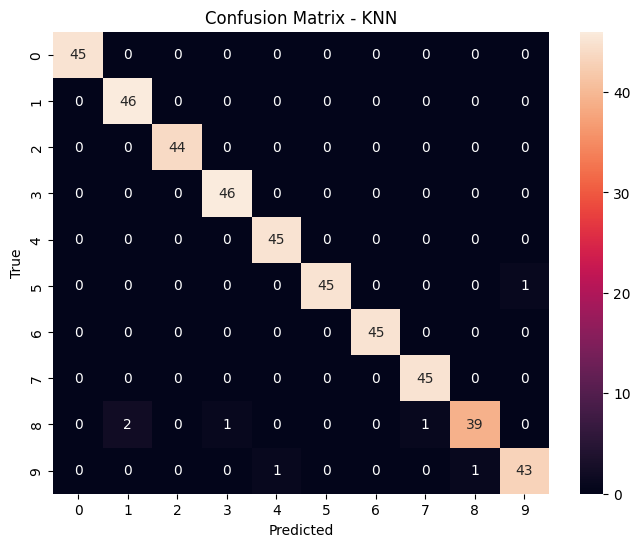

In [10]:
# 7. Confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_tree = confusion_matrix(y_test, y_pred_tree)


plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\nModels saved: knn_digits.joblib, svm_digits.joblib, dtree_digits.joblib, scaler.joblib')

## Suggested Exercises — Implementations

In [11]:
# Compare models using cross-validation
models = {
"KNN": KNeighborsClassifier(n_neighbors=5),
"SVM": SVC(kernel='linear', C=1),
"Decision Tree": DecisionTreeClassifier(max_depth=10)
}


for name, model in models.items():
  if name == "SVM":
    scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5)
  else:
    scores = cross_val_score(model, X, y, cv=5)
  print(f"{name} CV mean accuracy: {scores.mean():.4f}")

KNN CV mean accuracy: 0.9627
SVM CV mean accuracy: 0.9466
Decision Tree CV mean accuracy: 0.7880


In [14]:
# Tune hyperparameters (GridSearch examples)

# KNN hyperparameter tuning
param_grid_knn = {'n_neighbors': [1,2,3,4,5,7]}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
gs_knn.fit(X, y)
print("Best K for KNN:", gs_knn.best_params_, "with score", gs_knn.best_score_)


# Decision Tree tuning
param_grid_tree = {'max_depth': [5,10,15,20], 'criterion': ['gini','entropy']}
gs_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
gs_tree.fit(X, y)
print("Best Decision Tree params:", gs_tree.best_params_, "with score", gs_tree.best_score_)

Best K for KNN: {'n_neighbors': 2} with score 0.9671711544413494
Best Decision Tree params: {'criterion': 'entropy', 'max_depth': 15} with score 0.8130377592076756


In [ ]:
# Train models on your own digit/character dataset via OpenCV


In [15]:
# Build a GUI-based digit recognition app with OpenCV
def digit_recognition_gui(model):
  canvas = np.ones((200, 200), dtype=np.uint8) * 255
  drawing = False

  def draw(event, x, y, flags, param):
    nonlocal drawing
    if event == cv2.EVENT_LBUTTONDOWN:
      drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
      cv2.circle(canvas, (x,y), 8, (0,), -1)
    elif event == cv2.EVENT_LBUTTONUP:
      drawing = False


  cv2.namedWindow("Draw Digit")
  cv2.setMouseCallback("Draw Digit", draw)
  while True:
    cv2.imshow("Draw Digit", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('p'): # Predict
      img_resized = cv2.resize(canvas, (8,8))
      img_processed = (16 - (img_resized // 16)).flatten().reshape(1, -1)
      pred = model.predict(img_processed)
      print("Predicted Digit:", pred[0])
    elif key == ord('c'): # Clear canvas
      canvas[:] = 255
    elif key == 27: # ESC to exit
      break
  cv2.destroyAllWindows()


In [ ]:

digit_recognition_gui(knn)